<h2>polynomial-regression </h2>
<a href="https://colab.research.google.com/github/thedhruvish/ml-algorithms-project/blob/main/polynomial-regression/project-economics.ipynb">
<img src="https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/public/colab.svg" alt="colab svg"></a>
<h3>economics Dataset </h3>

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/economics.csv')

In [28]:
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


In [29]:
df = df.drop(columns=['date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pce       574 non-null    float64
 1   pop       574 non-null    int64  
 2   psavert   574 non-null    float64
 3   uempmed   574 non-null    float64
 4   unemploy  574 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 22.5 KB


In [31]:
df

,pce,pop,psavert,uempmed,unemploy
0,507.4,198712,12.5,4.5,2944
1,510.5,198911,12.5,4.7,2945
2,516.3,199113,11.7,4.6,2958
3,512.9,199311,12.5,4.9,3143
4,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...
569,12122.0,320201,5.0,12.6,8688
570,12080.8,320367,5.5,13.4,8979
571,12095.9,320534,5.7,13.1,8705
572,12161.5,320707,5.2,12.2,8575


In [32]:
X = df.drop(columns=['unemploy'])
y = df['unemploy']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=51)

In [35]:
poly = PolynomialFeatures()

In [36]:
X_train_poly  = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  

In [37]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [41]:
y_train_pred

array([ 7658.86998086, 10997.47422778,  7687.17974958,  7612.47090052,
        9629.46918084,  4980.33587705,  6731.2537911 ,  7652.30852365,
        7245.38677533,  6427.38488185,  3295.88842624,  2291.5839441 ,
        8203.30039767,  6572.86797476,  6856.64795663,  6208.60469974,
        8544.04698893, 13589.3113438 , 15214.86181471,  2325.02432975,
        7399.26674809,  5344.32503727, 10671.99548734, 13504.18426876,
        8878.8801128 ,  6953.1156349 ,  8440.38924828,  6489.25619712,
        5148.10327338, 11296.79802443,  7346.43311315,  7460.77562947,
        5000.96879554,  4239.68709932,  6250.78218155, 11260.84961874,
        7911.35109078,  7164.44578757,  7386.74690032,  7258.40173812,
        7180.58541896,  9537.22436677,  3459.7141512 , 10048.50466466,
        6318.78224528,  7551.0063028 ,  8122.5777889 ,  5073.08300893,
        9419.92432497,  8046.10629721,  6756.55201831,  7250.89935723,
       14543.31719138,  9030.31033818,  9019.49287122,  8111.08773081,
      

In [42]:
y_test_pred

array([ 8402.15184299,  3641.36221912,  8213.70785215, 10134.78355204,
        7437.15499874,  7050.08787011,  6267.70983251, 13902.89742991,
        8324.95869396,  3695.9135829 ,  5006.58011903, 10501.53529125,
        7082.61127935,  6227.71753766, 13511.98953048,  7612.75379037,
        5130.85891115,  4934.05207063,  7732.62654053, 11551.24527459,
        6352.22889984,  6147.20053452,  6744.65098787,  6945.81685795,
        9115.24714194,  6628.66819397, 14080.76461502,  6539.73735327,
       10834.75578032,  8137.84183724,  6500.71166134,  8694.83157034,
        8506.37958531, 14183.74382772,  7970.83067676,  6979.65386292,
        8005.2325754 ,  8648.74970785, 14602.30001783,  4275.86698673,
        7022.32581515,  5170.64615565, 13796.22987656, 10450.83746483,
        4822.36747458,  4773.14417532,  3234.25473096,  8068.8147501 ,
        9946.37369622,  9784.7598389 , 13865.71301754, 10707.82982647,
        9796.88548438,  7564.0343673 ,  9903.24347883, 12279.73791155,
      

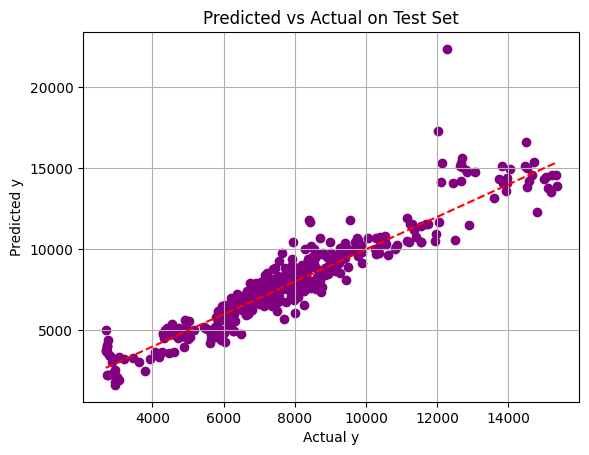

In [39]:
plt.scatter(y_test, y_test_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Actual on Test Set')
plt.grid(True)
plt.show()

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test_pred.shape)

(114, 4)
(114,)
(460, 4)
(460,)
(460, 4)
(460,)
